In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__.split(".")

['1', '5', '1']

In [3]:
category_salaries = pd.read_csv("salaries_usable.csv")
safe_category_salaries = category_salaries.copy()

In [4]:
safe_category_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


In [5]:
classes = pd.api.types.CategoricalDtype(ordered = True, categories = ['EN', 'MI', 'SE', 'EX'])
safe_category_salaries['experience_level'] = safe_category_salaries['experience_level'].astype(classes)

In [6]:
safe_category_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           1332 non-null   int64   
 1   experience_level    1332 non-null   category
 2   employment_type     1332 non-null   object  
 3   job_title           1332 non-null   object  
 4   salary              1332 non-null   int64   
 5   salary_currency     1332 non-null   object  
 6   salary_in_usd       1332 non-null   int64   
 7   employee_residence  1332 non-null   object  
 8   remote_ratio        1332 non-null   int64   
 9   company_location    1332 non-null   object  
 10  company_size        1332 non-null   object  
dtypes: category(1), int64(4), object(6)
memory usage: 105.7+ KB


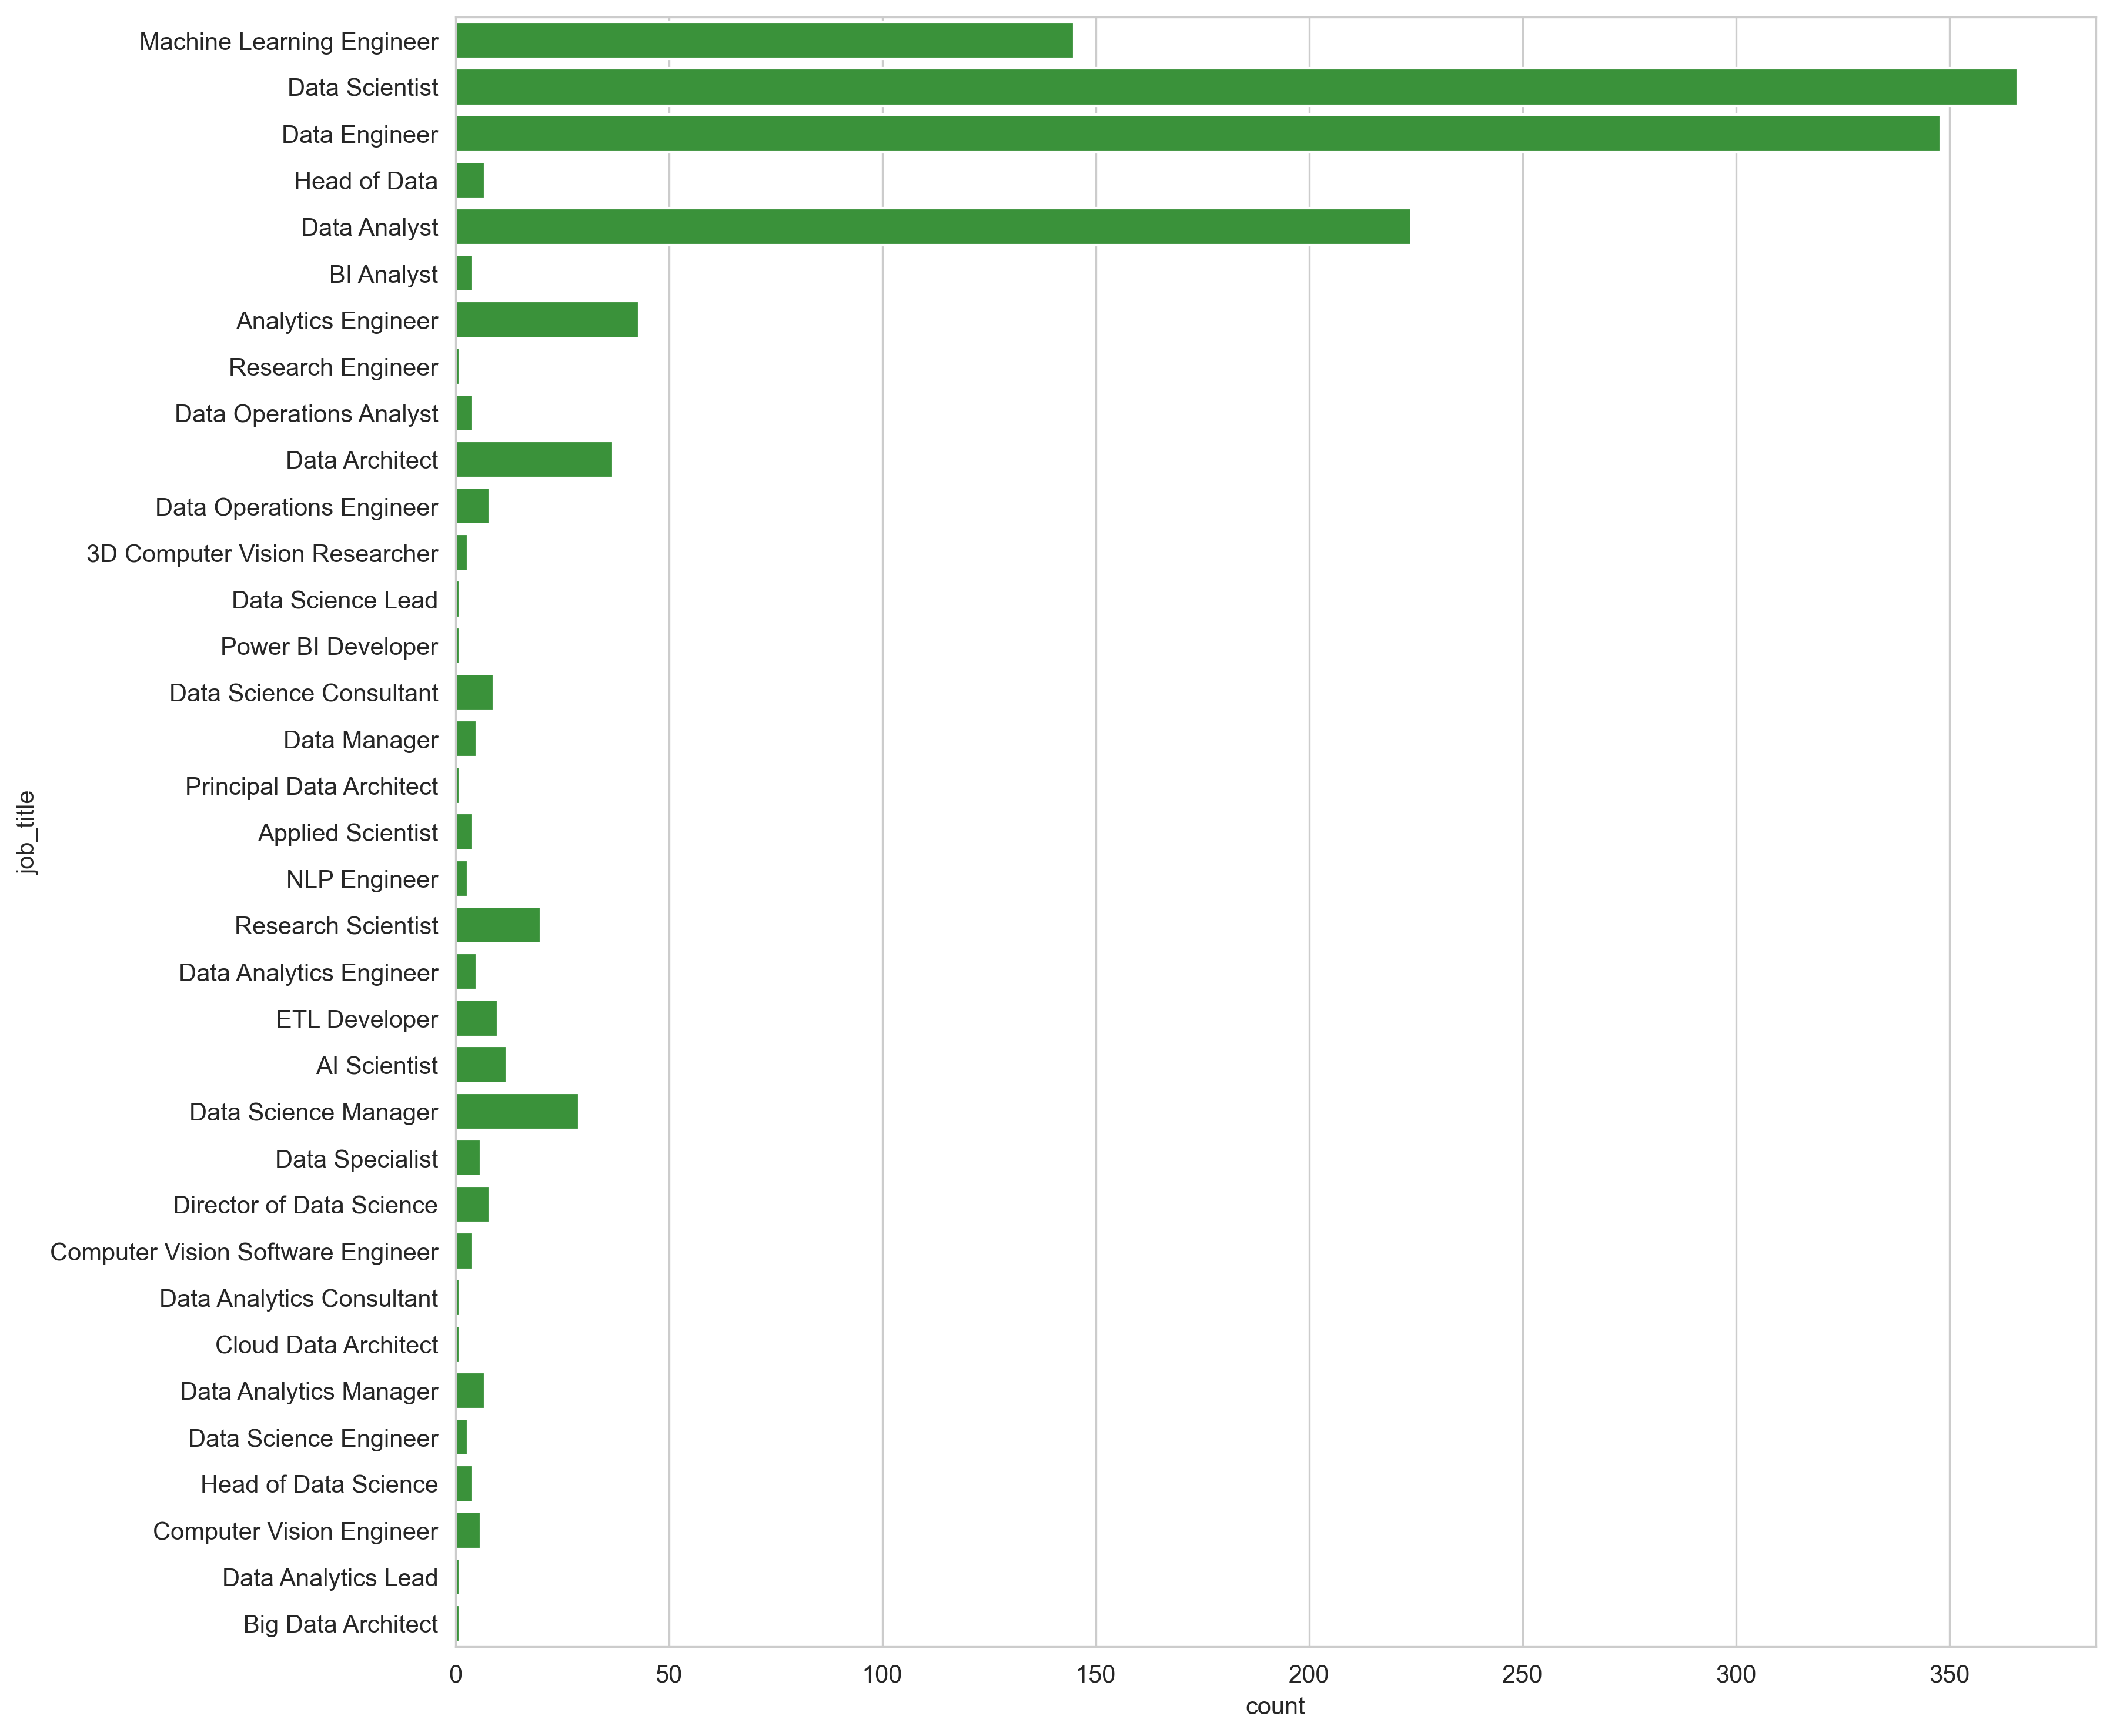

In [7]:
safe_category_salaries.loc[safe_category_salaries['job_title'].str.contains('Data Scientist'), 'job_title'] = 'Data Scientist'
safe_category_salaries.loc[safe_category_salaries['job_title'].str.contains('Data Engineer'), 'job_title'] = 'Data Engineer'
safe_category_salaries.loc[safe_category_salaries['job_title'].str.contains('Bi Data Analyst'), 'job_title'] = 'Bi Analyst'
safe_category_salaries.loc[safe_category_salaries['job_title'].str.contains('Data Analyst'), 'job_title'] = 'Data Analyst'
safe_category_salaries.loc[safe_category_salaries['job_title'].str.contains('Machine Learning'), 'job_title'] = 'Machine Learning Engineer'
safe_category_salaries.loc[safe_category_salaries['job_title'].str.contains('ML Engineer'), 'job_title'] = 'Machine Learning Engineer'

#Displaying the various job title_name entries 
sns.set_style('whitegrid')
plt.figure(figsize=[12,12], dpi=300)
default_color = sns.color_palette()[2]
sns.countplot(data=safe_category_salaries,color=default_color, y='job_title')
plt.show()

In [8]:
print(safe_category_salaries['job_title'].unique())
print(safe_category_salaries['job_title'].nunique())

['Machine Learning Engineer' 'Data Scientist' 'Data Engineer'
 'Head of Data' 'Data Analyst' 'BI Analyst' 'Analytics Engineer'
 'Research Engineer' 'Data Operations Analyst' 'Data Architect'
 'Data Operations Engineer' '3D Computer Vision Researcher'
 'Data Science Lead' 'Power BI Developer' 'Data Science Consultant'
 'Data Manager' 'Principal Data Architect' 'Applied Scientist'
 'NLP Engineer' 'Research Scientist' 'Data Analytics Engineer'
 'ETL Developer' 'AI Scientist' 'Data Science Manager' 'Data Specialist'
 'Director of Data Science' 'Computer Vision Software Engineer'
 'Data Analytics Consultant' 'Cloud Data Architect'
 'Data Analytics Manager' 'Data Science Engineer' 'Head of Data Science'
 'Computer Vision Engineer' 'Data Analytics Lead' 'Big Data Architect']
35


In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [10]:
# List of categorical variable
lim_categoric_vars = ['work_year', 'experience_level', 'company_size', 'employment_type', 'remote_ratio']
categoric_vars = ['company_location', 'employee_residence', 'job_title']

In [11]:
for var in categoric_vars:
    z = safe_category_salaries[var].value_counts().head(10)
    #order = safe_category_salaries[var].value_counts().head(10).index
    #print(safe_category_salaries[safe_category_salaries[var].apply(lambda x: x in z.index)])
